In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

**删除多余文件**

In [2]:
# 指定数据集路径
dataset_path = 'Particle Figures_full'

In [3]:
!find . -iname '__MACOSX'

In [4]:
!find . -iname '.DS_Store'

In [12]:
!find . -iname '.ipynb_checkpoints'

./Particle Figures_full/.ipynb_checkpoints
./Particle Figures_full/Rounded/.ipynb_checkpoints
./.local/share/Trash/files/val 4/.ipynb_checkpoints
./.local/share/Trash/files/train 4/.ipynb_checkpoints
./.local/share/Trash/files/Particle Figures/.ipynb_checkpoints


In [17]:
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

In [18]:
!find . -iname '.ipynb_checkpoints'

./Particle Figures_full/.ipynb_checkpoints
./Particle Figures_full/Rounded/.ipynb_checkpoints
./.local/share/Trash/files/val 4/.ipynb_checkpoints
./.local/share/Trash/files/train 4/.ipynb_checkpoints
./.local/share/Trash/files/Particle Figures/.ipynb_checkpoints


In [19]:
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

**指定数据集路径**

In [7]:
# 指定数据集路径
dataset_path = 'Particle Figures_full'
os.chdir(dataset_path)
os.listdir()

['Subrounded',
 'Very angular',
 'Angular',
 'Well rounded',
 'Rounded',
 'Subangular']

In [8]:
df = pd.DataFrame()
for particle in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(particle)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df._append({'Type':particle, 'File name':file, 'Width':img.shape[1], 'Height':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(particle, file), '读取错误')
    os.chdir('../')
os.chdir('../')

 67%|██████▋   | 4/6 [00:08<00:03,  1.78s/it]

Rounded/.ipynb_checkpoints 读取错误


100%|██████████| 6/6 [00:13<00:00,  2.21s/it]


In [9]:
df

,Type,File name,Width,Height
0,Subrounded,Subrounded (24).jpg,1300,957
1,Subrounded,Subrounded (106).jpg,500,270
2,Subrounded,Subrounded (129).jpg,640,640
3,Subrounded,Subrounded (18).jpg,1024,680
4,Subrounded,Subrounded (185).jpg,960,538
...,...,...,...,...
1243,Subangular,Subangular (83).jpg,500,333
1244,Subangular,Subangular (264).jpg,800,500
1245,Subangular,Subangular (25).jpg,1024,680
1246,Subangular,Subangular (272).jpg,500,328


**可视化图像尺寸分布**

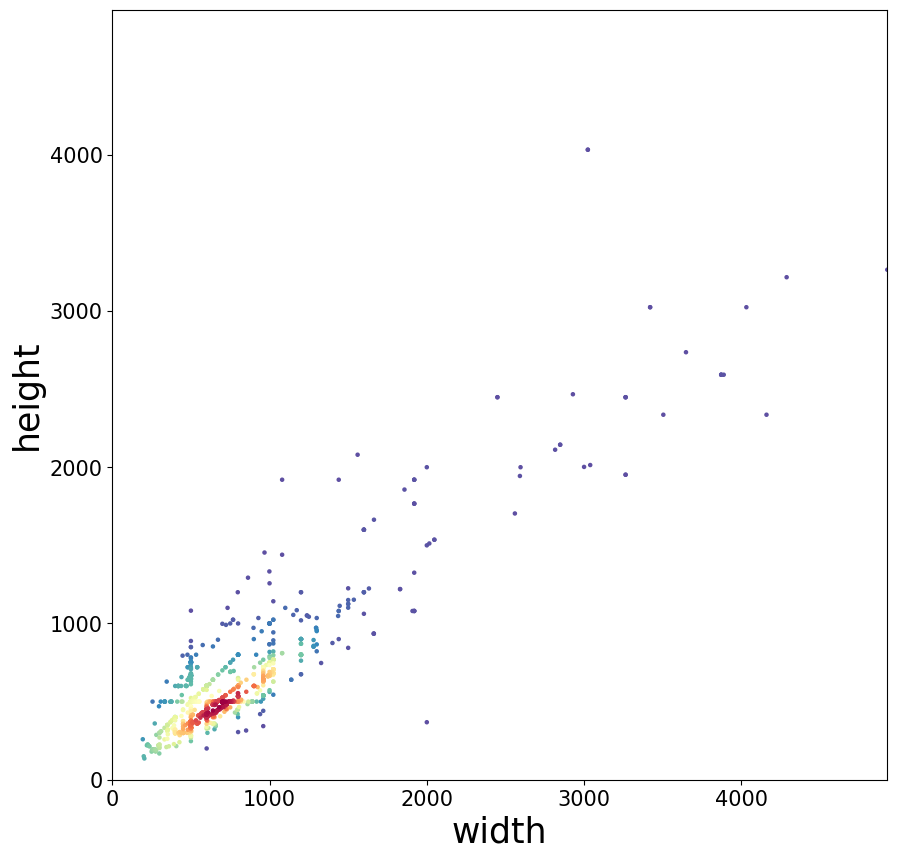

In [11]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['Width']
y = df['Height']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['Width']), max(df['Height']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('Image Size Distribution.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [2]:
jupyter nbconvert test.ipynb --to markdown

SyntaxError: invalid syntax (4264478939.py, line 1)